<a href="https://colab.research.google.com/github/oghenerosiloko/Nigeria-COVID-19-VISUALS/blob/main/Nigeria_Covid19_An_Exploratory_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**COVID-19 CASES IN NIGERIA, AN EXPLORATORY ANALYSIS**

This a pure exploratory approach to the COVID-19 cases in Nigeria, 
the dataset used for this analysis were webscrapped from [NCDC Website](https://covid19.ncdc.gov.ng/) using Microsoft Power BI. While the second data set used for the Time series analysis were downloaded from [Our World  Corona virus dataset](https://ourworldindata.org/coronavirus-source-data). All data were gotten as at 14th of January, 2021.



In [ ]:
#library declaration
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import files
upload= files.upload()


Saving owid-covid-data (1).csv to owid-covid-data (1).csv


In [ ]:
#Overview of world covid19 data set
worlddata=pd.read_csv("owid-covid-data (1).csv")
worlddata.head(2)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498


In [ ]:
#Import Nigeria covid data with state
paths="/content/Nigeria_covid19.csv"
Nigeriacovid=pd.read_csv(paths)

In [ ]:
Nigeriacovid.head(2)

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,37852,7679,29913,260
1,FCT,13938,5995,7832,111


In [ ]:
#WORLD DATA CLOUMNS
worlddata.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'new_vaccinations', 'new_vaccinations_smoothed',
       'total_vaccinations_per_hundred',
       'new_vaccinations_smoothed_per_mil

In [ ]:
#Dropping unnecesary columns
worlddata.drop(['new_cases_smoothed', 'iso_code',	'continent','new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'new_vaccinations', 'new_vaccinations_smoothed',
       'total_vaccinations_per_hundred',
       'new_vaccinations_smoothed_per_million', 'stringency_index',
       'population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index'],1, inplace= True)

In [ ]:
worlddata.head()

,location,date,total_cases,new_cases,total_deaths,new_deaths
0,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN
1,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN
2,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN
3,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN
4,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN


In [ ]:
#FILTERING OUT NIGERIA CASES FOR THE TIME SERIES
nigeriats= worlddata[(worlddata.location =="Nigeria")]
nigeriats


,location,date,total_cases,new_cases,total_deaths,new_deaths
39210,Nigeria,2020-02-28,1.0,1.0,NaN,NaN
39211,Nigeria,2020-02-29,1.0,0.0,NaN,NaN
39212,Nigeria,2020-03-01,1.0,0.0,NaN,NaN
39213,Nigeria,2020-03-02,1.0,0.0,NaN,NaN
39214,Nigeria,2020-03-03,1.0,0.0,NaN,NaN
...,...,...,...,...,...,...
39526,Nigeria,2021-01-09,99063.0,1585.0,1350.0,8.0
39527,Nigeria,2021-01-10,100087.0,1024.0,1358.0,8.0
39528,Nigeria,2021-01-11,101331.0,1244.0,1361.0,3.0
39529,Nigeria,2021-01-12,102601.0,1270.0,1373.0,12.0


In [ ]:
#Replace missing values with 0
nigeriats.fillna(0, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
#Convert date to date time format
nigeriats['date'] = pd.to_datetime(nigeriats['date'], format='%Y-%m-%d')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
nigeriats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 321 entries, 39210 to 39530
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   location      321 non-null    object        
 1   date          321 non-null    datetime64[ns]
 2   total_cases   321 non-null    float64       
 3   new_cases     321 non-null    float64       
 4   total_deaths  321 non-null    float64       
 5   new_deaths    321 non-null    float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 17.6+ KB


In [ ]:
#setting my date as index
nigeriats= nigeriats.set_index('date')
nigeriats.head(5)

,location,total_cases,new_cases,total_deaths,new_deaths
date,,,,,
2020-02-28,Nigeria,1.0,1.0,0.0,0.0
2020-02-29,Nigeria,1.0,0.0,0.0,0.0
2020-03-01,Nigeria,1.0,0.0,0.0,0.0
2020-03-02,Nigeria,1.0,0.0,0.0,0.0
2020-03-03,Nigeria,1.0,0.0,0.0,0.0


Text(0.5, 1.0, 'Time Series for Total Covid19 cases in Nigeria')

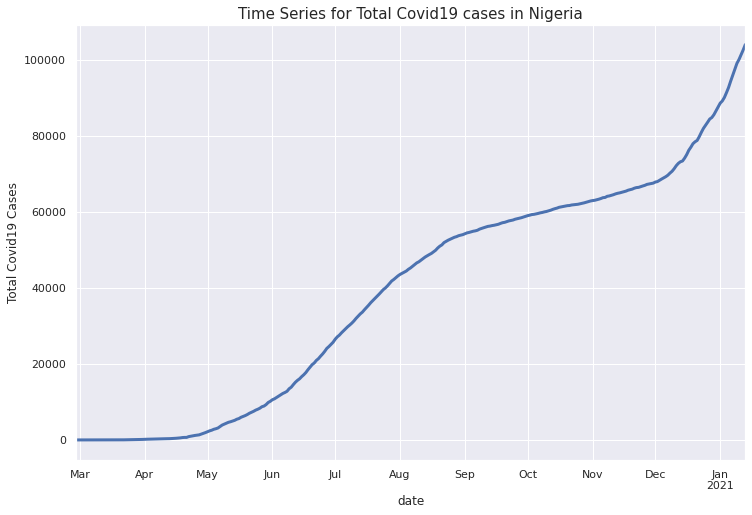

In [ ]:
#Time series Plot for total Cases
sns.set(rc={'figure.figsize':(12, 8)})
nigeriats['total_cases'].plot(linewidth=3)
plt.ylabel('Total Covid19 Cases')
plt.title("Time Series for Total Covid19 cases in Nigeria", fontsize=15)


Text(0.5, 1.0, 'Time Series for Total Death Covid19 cases in Nigeria')

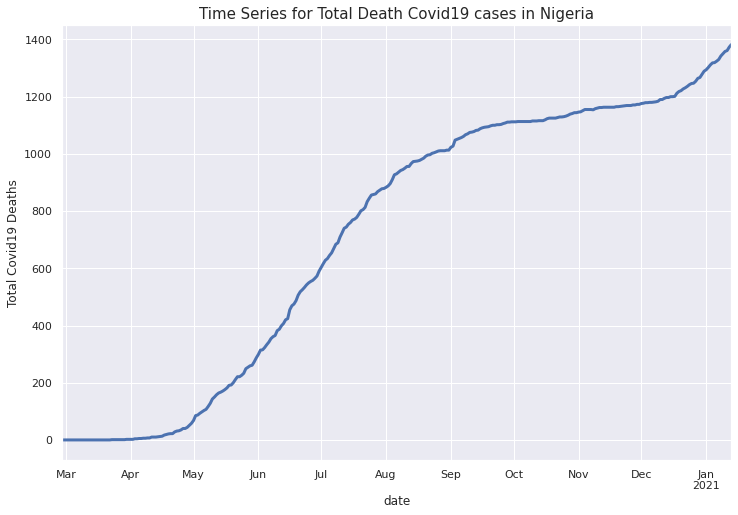

In [ ]:
#Plot for Total death
sns.set(rc={'figure.figsize':(12, 8)})
nigeriats['total_deaths'].plot(linewidth=3)
plt.ylabel('Total Covid19 Deaths')
plt.title("Time Series for Total Death Covid19 cases in Nigeria", fontsize=15)


Text(0.5, 1.0, 'Trend for New Covid19 Cases in Nigeria')

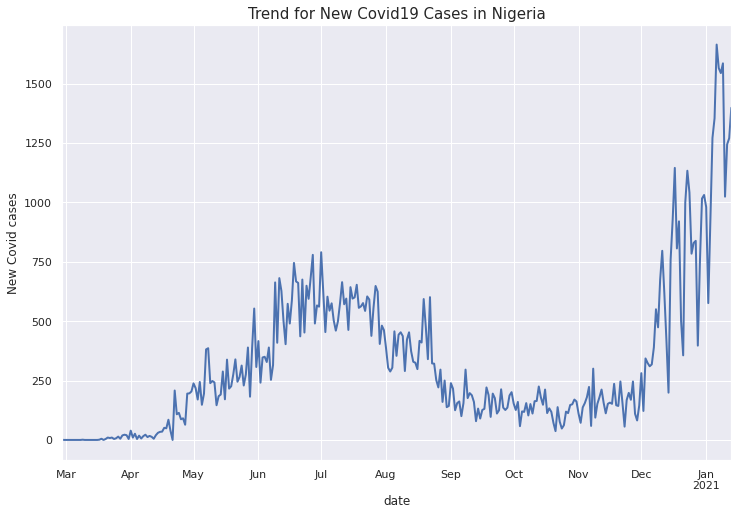

In [ ]:
#Plot for New Cases
sns.set(rc={'figure.figsize':(12, 8)})
nigeriats['new_cases'].plot(linewidth=2)
plt.ylabel('New Covid cases')
plt.title("Trend for New Covid19 Cases in Nigeria", fontsize=15)


Text(0.5, 1.0, 'Trend for Death Cases of Covid19 in Nigeria')

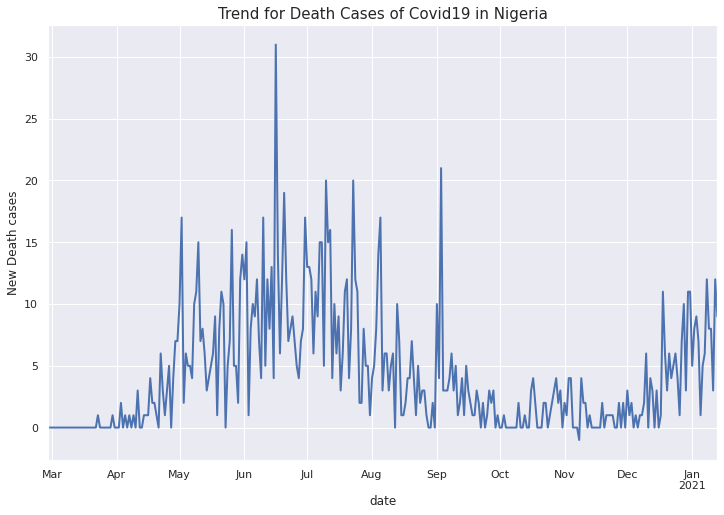

In [ ]:
#Plot for Death Cases
sns.set(rc={'figure.figsize':(12, 8)})
nigeriats['new_deaths'].plot(linewidth=2)
plt.ylabel('New Death cases')
plt.title("Trend for Death Cases of Covid19 in Nigeria", fontsize=15)

In [ ]:
#analysis of cases within each state
Nigeriacovid.head(5)

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,37852,7679,29913,260
1,FCT,13938,5995,7832,111
2,Plateau,6073,419,5608,46
3,Kaduna,5888,367,5466,55
4,Oyo,4546,838,3654,54


In [ ]:
#indepth State by State Analysis
Nigeriacovid.columns

Index(['States Affected', 'No. of Cases (Lab Confirmed)',
       'No. of Cases (on admission)', 'No. Discharged', 'No. of Deaths'],
      dtype='object')

In [ ]:
#Renaming of the column
Nigeriacovid.columns=['States_Affected', 'Total_confirmedCases','Active_Cases', 'Recovered_cases', 'Death_cases']
Nigeriacovid.head(2)

,States_Affected,Total_confirmedCases,Active_Cases,Recovered_cases,Death_cases
0,Lagos,37852,7679,29913,260
1,FCT,13938,5995,7832,111


ADDITION OF NEW COLUMNS FOR DEATH RATE AND RECOVERY RATE

In [ ]:
Nigeriacovid['Death_rate']= round(Nigeriacovid['Death_cases']/Nigeriacovid['Total_confirmedCases']*100, 2)
Nigeriacovid['Recovery_rate']= round(Nigeriacovid['Recovered_cases']/Nigeriacovid['Total_confirmedCases']*100, 2)
Nigeriacovid.head()

,States_Affected,Total_confirmedCases,Active_Cases,Recovered_cases,Death_cases,Death_rate,Recovery_rate
0,Lagos,37852,7679,29913,260,0.69,79.03
1,FCT,13938,5995,7832,111,0.80,56.19
2,Plateau,6073,419,5608,46,0.76,92.34
3,Kaduna,5888,367,5466,55,0.93,92.83
4,Oyo,4546,838,3654,54,1.19,80.38


Text(0.5, 1.0, 'Correlation Map of Covid19 in Nigeria')

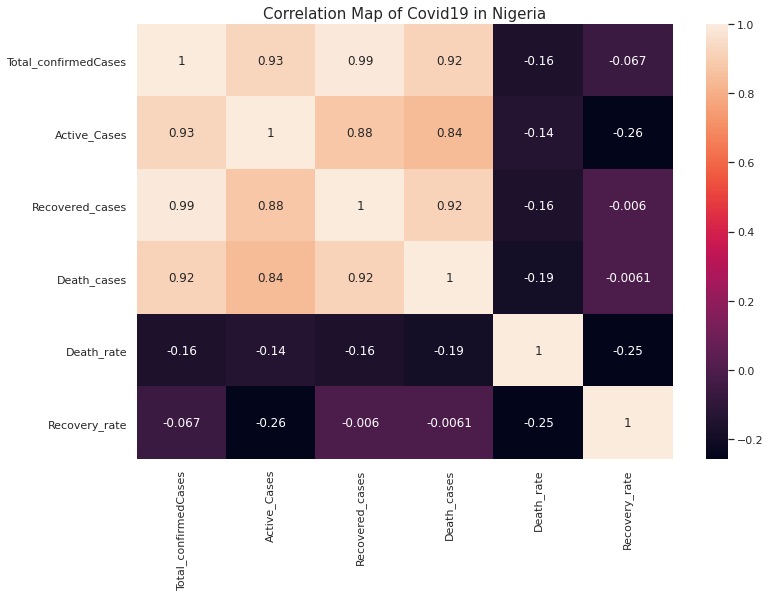

In [ ]:
#Correlation of columns
corelation= Nigeriacovid.corr()
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns, annot=True)
plt.title("Correlation Map of Covid19 in Nigeria", fontsize=15)

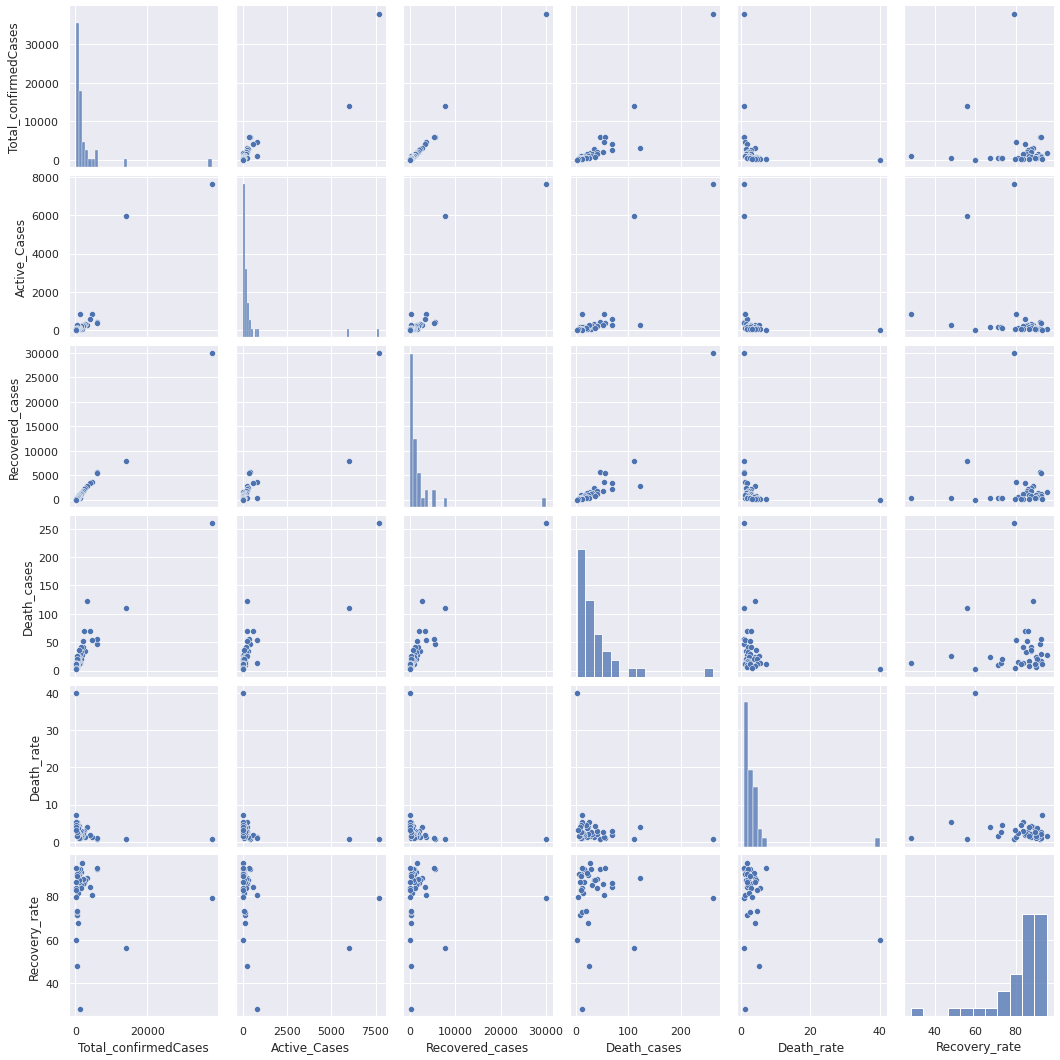

In [ ]:
#Pairplot
sns.pairplot(Nigeriacovid)

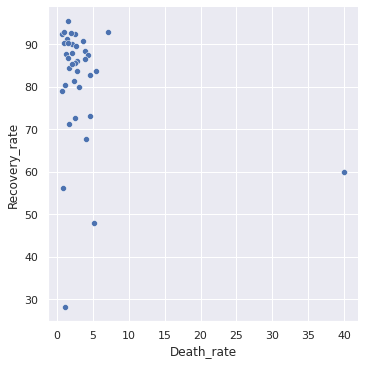

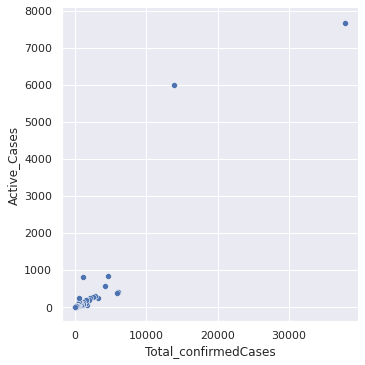

In [ ]:
#RELATION PLOTS FOR BOTH ACTIVE CASES VS TOTAL CASES, DEATH RATE VS RECOVERY RATE
sns.relplot(x='Death_rate', y='Recovery_rate', data= Nigeriacovid)
sns.relplot(x='Total_confirmedCases', y='Active_Cases', data=Nigeriacovid)

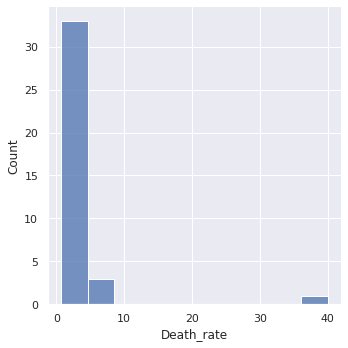

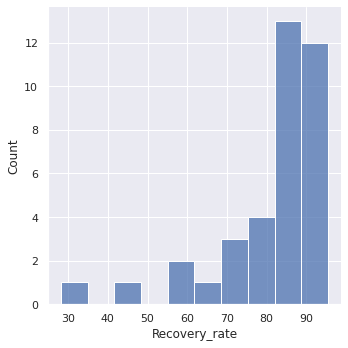

In [ ]:
#Distribution Plots
sns.displot(Nigeriacovid["Death_rate"], bins=10)
sns.displot(Nigeriacovid["Recovery_rate"], bins=10)

Text(0.5, 1.0, 'Total Confirmed Cases of Covid19 by State')

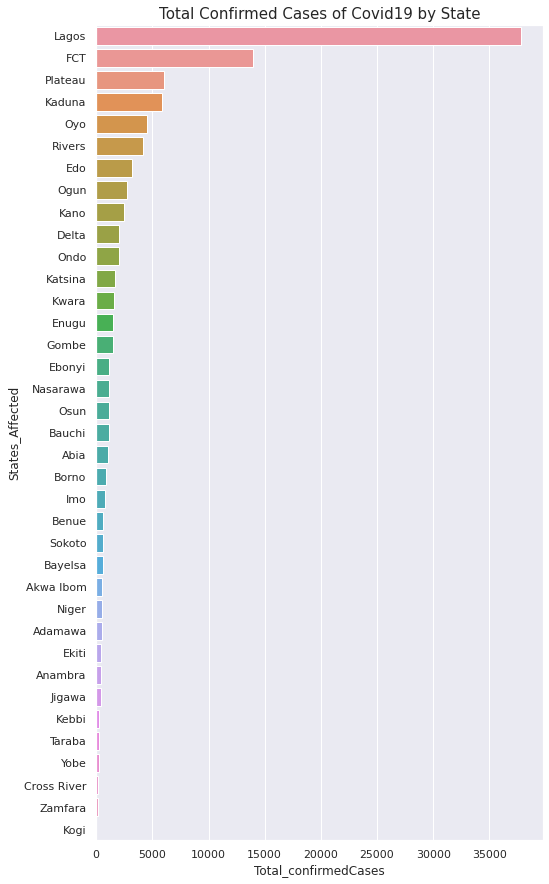

In [ ]:
#Qick overview of each state
fig_dims= (8, 15)
fig, ax=plt.subplots(figsize=fig_dims)
sns.barplot(x="Total_confirmedCases", y="States_Affected",ax=ax, data=Nigeriacovid)
plt.title("Total Confirmed Cases of Covid19 by State", fontsize=15)

Text(0.5, 1.0, 'Death rate of Covid19 by State')

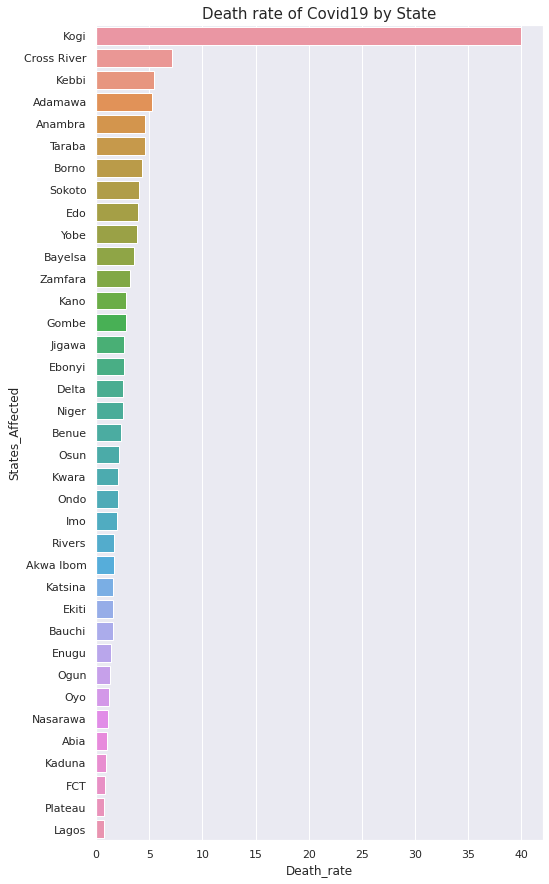

In [ ]:
#Death Rate by State
fig_dims= (8, 15)
fig, ax=plt.subplots(figsize=fig_dims)
sns.barplot(x="Death_rate", y="States_Affected",ax=ax, data=Nigeriacovid, order=Nigeriacovid.sort_values('Death_rate', ascending=False).States_Affected)
plt.title("Death rate of Covid19 by State", fontsize=15)

Text(0.5, 1.0, 'Recovery rate of Covid19 by State')

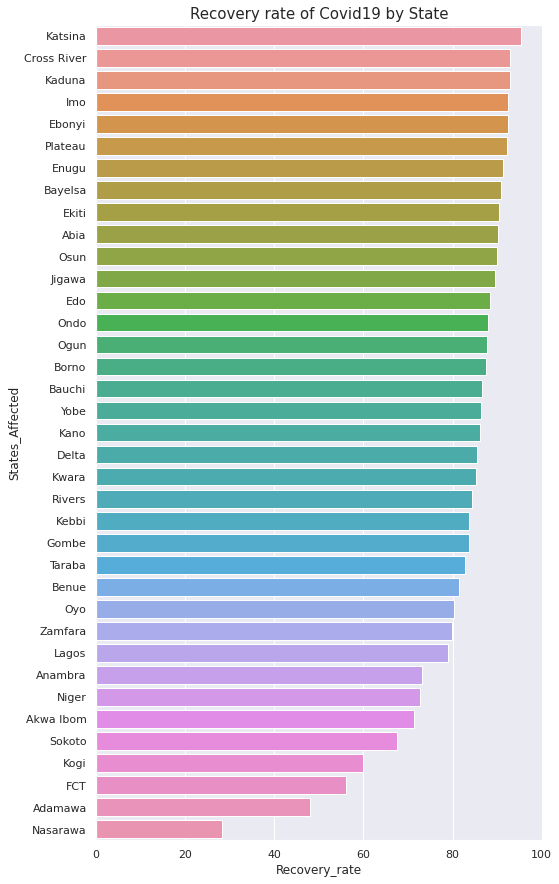

In [ ]:
#Recovery rate by State
fig_dims= (8, 15)
fig, ax=plt.subplots(figsize=fig_dims)
sns.barplot(x="Recovery_rate", y="States_Affected",ax=ax, data=Nigeriacovid, order=Nigeriacovid.sort_values('Recovery_rate', ascending=False).States_Affected)
plt.title("Recovery rate of Covid19 by State", fontsize=15)

Text(0.5, 1.0, 'Active Cases of Covid19 by State')

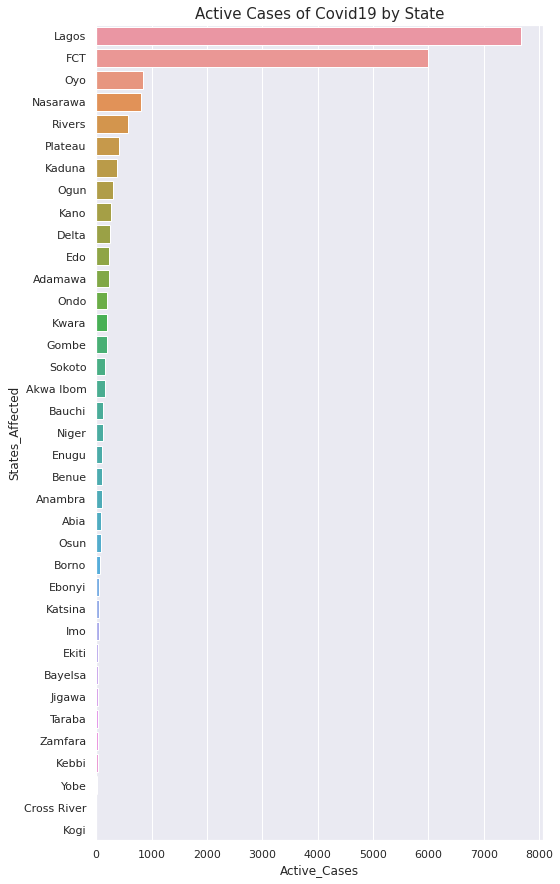

In [ ]:
#Active Cases
fig_dims= (8, 15)
fig, ax=plt.subplots(figsize=fig_dims)
sns.barplot(x="Active_Cases", y="States_Affected",ax=ax, data=Nigeriacovid, order=Nigeriacovid.sort_values("Active_Cases", ascending=False).States_Affected)
plt.title("Active Cases of Covid19 by State", fontsize=15)